In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#%cd /content/drive/MyDrive/AI-Medic/Projects/P4
%cd /content/drive/MyDrive/P4

/content/drive/.shortcut-targets-by-id/13zYMwPj9a8yYFyjit1V6DDxVOCZCQHHY/P4


In [ ]:
!wget https://warwick.ac.uk/fac/cross_fac/tia/data/hovernet/consep.zip

In [ ]:
!unzip "consep.zip"

In [ ]:
!pip uninstall tensorflow tensorboard tensorboard-data-server tensorflow-datasets tensorflow-estimator tensorflow-gcs-config tensorflow-hub tensorflow-metadata tensorflow-probability keras keras-nightly Keras-Preprocessing keras-vis -y
!pip install tensorflow==2.4.1
!pip install keras==2.4.3
!pip install git+https://github.com/divamgupta/image-segmentation-keras

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
Found existing installation: tensorboard 2.6.0
Uninstalling tensorboard-2.6.0:
  Successfully uninstalled tensorboard-2.6.0
Found existing installation: tensorboard-data-server 0.6.1
Uninstalling tensorboard-data-server-0.6.1:
  Successfully uninstalled tensorboard-data-server-0.6.1
Found existing installation: tensorflow-datasets 4.0.1
Uninstalling tensorflow-datasets-4.0.1:
  Successfully uninstalled tensorflow-datasets-4.0.1
Found existing installation: tensorflow-estimator 2.6.0
Uninstalling tensorflow-estimator-2.6.0:
  Successfully uninstalled tensorflow-estimator-2.6.0
Found existing installation: tensorflow-gcs-config 2.6.0
Uninstalling tensorflow-gcs-config-2.6.0:
  Successfully uninstalled tensorflow-gcs-config-2.6.0
Found existing installation: tensorflow-hub 0.12.0
Uninstalling tensorflow-hub-0.12.0:
  Successfully uninstalled tensorflow-hub-0.12.0
Found 

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy.io

from sklearn.metrics import confusion_matrix

from keras_segmentation.models.unet import resnet50_unet, vgg_unet
from keras_segmentation.predict import model_from_checkpoint_path
from keras_segmentation.metrics import get_iou

# Load Data

In [ ]:
for i in range(1,28):
  
  img = cv2.imread(f'CoNSeP/Train/Images/train_{i}.png')
  img = cv2.resize(img, (512, 512))
  cv2.imwrite(f'CoNSeP/Train_512/Images/train_{i}.png', img)

  mat = scipy.io.loadmat(os.path.join(f'CoNSeP/Train/Labels/train_{i}.mat'))
  temp = mat['type_map']
  temp = cv2.resize(temp, (512, 512))
  cv2.imwrite(f'CoNSeP/Train_512/Labels/train_{i}.png', temp)

for i in range(1,15):
  img = cv2.imread(f'CoNSeP/Test/Images/test_{i}.png')
  img = cv2.resize(img, (512, 512))
  cv2.imwrite(f'CoNSeP/Test_512/Images/test_{i}.png', img)

  mat = scipy.io.loadmat(os.path.join(f'CoNSeP/Test/Labels/test_{i}.mat'))
  temp = mat['type_map']
  temp = cv2.resize(temp, (512, 512))
  cv2.imwrite(f'CoNSeP/Test_512/Labels/test_{i}.png', temp)
  

In [ ]:
X_train = []
Y_train = []

for i in range(1,28):
  
  img = cv2.imread(os.path.join('CoNSeP/Train/Images',f'train_{i}.png'))
  img = cv2.resize(img, (1024, 1024)) 
  mat = scipy.io.loadmat(os.path.join('CoNSeP/Train/Labels',f'train_{i}.mat'))
  Y_train.append(mat['type_map'])
  X_train.append(img)

X_train = np.array(X_train)
Y_train = np.array(Y_train)
Y_train_temp = np.zeros((Y_train.shape[0], 1024, 1024))
for i in range(Y_train.shape[0]):
  Y_train_temp[i] = cv2.resize(Y_train[i], (1024, 1024), interpolation=cv2.INTER_NEAREST)
Y_train = Y_train_temp

# for i in range(27):
#   cv2.imwrite(f'CoNSeP/Train_new/Images/train_{i+1}.png', X_train[i])

# for i in range(27):
#   cv2.imwrite(f'CoNSeP/Train_new/Labels/train_{i+1}.png', Y_train[i])


image_shape = X_train.shape[1:]

In [ ]:
X_test = []
Y_test = []
for i in range(1,15):
  img = cv2.imread(os.path.join('CoNSeP/Test/Images',f'test_{i}.png'))
  img = cv2.resize(img, (1024, 1024))
  mat = scipy.io.loadmat(os.path.join('CoNSeP/Test/Labels',f'test_{i}.mat'))
  Y_test.append(mat['type_map'])
  if img is not None:
    X_test.append(img)
X_test = np.array(X_test)
Y_test = np.array(Y_test)
Y_test_temp = np.zeros((Y_test.shape[0], 1024, 1024))
for i in range(Y_test.shape[0]):
  Y_test_temp[i] = cv2.resize(Y_test[i], (1024, 1024), interpolation=cv2.INTER_NEAREST)
Y_test = Y_test_temp

# for i in range(14):
#   cv2.imwrite(f'CoNSeP/Test_new/Images/test_{i+1}.png', X_test[i])

for i in range(14):
  cv2.imwrite(f'CoNSeP/Test_new/Labels/test_{i+1}.png', Y_test[i])

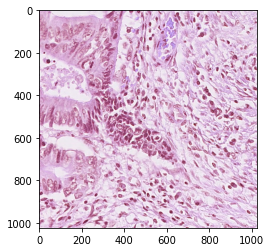

In [ ]:
plt.imshow(X_train[0])

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(image_shape)

(27, 1024, 1024, 3)
(27, 1024, 1024)
(14, 1024, 1024, 3)
(14, 1024, 1024)
(1024, 1024, 3)


# Train Model

In [ ]:
model = vgg_unet(n_classes=8,
                 input_height=512,
                 input_width=512
                )

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
model.train(
    train_images =  "CoNSeP/Train_512/Images/",
    train_annotations = "CoNSeP/Train_512/Labels/",
    checkpoints_path = "CoNSeP/checkpoints512/", 
    epochs=6,
    input_height=512,
    input_width=512
    )

Verifying training dataset


100%|██████████| 27/27 [00:26<00:00,  1.02it/s]


Dataset verified! 
Epoch 1/6
512/512 [==============================] - 442s 782ms/step - loss: 0.8556 - accuracy: 0.7990

Epoch 00001: saving model to CoNSeP/checkpoints512/.00001
Epoch 2/6
512/512 [==============================] - 400s 782ms/step - loss: 0.2938 - accuracy: 0.9085

Epoch 00002: saving model to CoNSeP/checkpoints512/.00002
Epoch 3/6
512/512 [==============================] - 400s 781ms/step - loss: 0.1972 - accuracy: 0.9410

Epoch 00003: saving model to CoNSeP/checkpoints512/.00003
Epoch 4/6
512/512 [==============================] - 399s 780ms/step - loss: 0.1430 - accuracy: 0.9567

Epoch 00004: saving model to CoNSeP/checkpoints512/.00004
Epoch 5/6
512/512 [==============================] - 399s 780ms/step - loss: 0.1183 - accuracy: 0.9626

Epoch 00005: saving model to CoNSeP/checkpoints512/.00005
Epoch 6/6
512/512 [==============================] - 400s 781ms/step - loss: 0.0959 - accuracy: 0.9684

Epoch 00006: saving model to CoNSeP/checkpoints512/.00006


# Evaluate model

In [ ]:
#model = model_from_checkpoint_path('/content/drive/MyDrive/AI-Medic/Projects/P4/CoNSeP/checkpoints512/')
model = model_from_checkpoint_path('/content/drive/MyDrive/P4/CoNSeP/checkpoints512/')

58892288/58889256 [==============================] - 3s 0us/step
loaded weights  /content/drive/MyDrive/P4/CoNSeP/checkpoints512/.00006


In [ ]:
Y_pred = []
for i in range(1, 15):
  outt = model.predict_segmentation(
      inp=f"CoNSeP/Test_512/Images/test_{i}.png",
      out_fname=f"CoNSeP/Test_512/Predictions/test_{i}.png",
      prediction_width=512,
      prediction_height=512
  )
  Y_pred.append(outt)

In [ ]:
Y_pred = np.array(Y_pred)

In [ ]:
Y_pred_temp = np.zeros((14,512,512))
for i in range(14):
  Y_pred_temp[i] = cv2.resize(Y_pred[i], (512, 512), interpolation=cv2.INTER_NEAREST)
Y_pred = Y_pred_temp.copy()

In [ ]:
Y_pred = Y_pred.reshape((14,-1))
Y_pred.shape

(14, 262144)

In [ ]:
Y_test = []
for i in range(1,15):
  lbl = cv2.imread(f'CoNSeP/Test_512/Labels/test_{i}.png', 0)
  Y_test.append(lbl)

Y_test = np.array(Y_test)

In [ ]:
Y_test = Y_test.reshape((14,-1))
Y_test.shape

(14, 262144)

In [ ]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


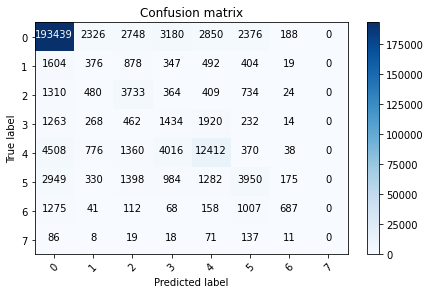

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

total_cm = np.zeros((8,8)).astype(int)
for i in range(14):
  cm = confusion_matrix(y_true=Y_test[i], y_pred=Y_pred[i])
  for i in range(8):
    for j in range(8):
      try:
        total_cm[i][j] += cm[i][j]
      except:
        pass

total_cm = total_cm / 14
total_cm = total_cm.astype(int)
label_names = ['0', '1', '2', '3', '4', '5', '6', '7']
plot_confusion_matrix(cm=total_cm, classes=label_names)

In [ ]:
all_iou = get_iou(Y_test, Y_pred, 8)
for i in range(8):
  print(f'mean iou for class{i}: ', all_iou[i])

mean iou for class0:  0.8788342154708862
mean iou for class1:  0.045071843133232474
mean iou for class2:  0.2659549023698901
mean iou for class3:  0.09842838030550287
mean iou for class4:  0.4047347311442267
mean iou for class5:  0.24185479003944688
mean iou for class6:  0.1799144420989707
mean iou for class7:  0.0


In [ ]:
def get_dice(Y_test, Y_pred, num_class):

  total_dice = np.zeros((num_class,))

  for i in range(num_class):
    for j in range(Y_test.shape[0]):
      total_dice[i] += (2 * np.sum(Y_pred[j][Y_test[j] == i] == i)) / (np.sum(Y_pred[j] == i) + np.sum(Y_test[j] == i))
    if np.isnan(total_dice[i]):
      total_dice[i] = 0
  total_dice = (total_dice / Y_test.shape[0]).astype(float)

  return total_dice

In [ ]:
all_dice = get_dice(Y_test, Y_pred, 8)
for i in range(8):
  print(f'mean dice for class{i}: ', all_dice[i])

mean dice for class0:  0.9328955502987004
mean dice for class1:  0.07983085988281965
mean dice for class2:  0.30403264098060057
mean dice for class3:  0.0850154091880152
mean dice for class4:  0.31325649662009003
mean dice for class5:  0.3035948671339949
mean dice for class6:  0.07097130063787328
mean dice for class7:  0.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in long_scalars
  import sys


In [ ]:
idx = 0

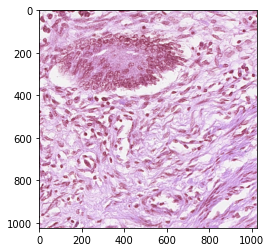

In [ ]:
plt.imshow(X_test[idx])

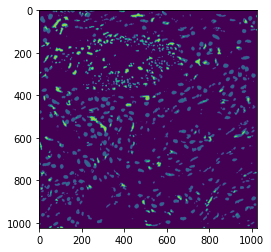

In [ ]:
plt.imshow(Y_pred[idx])

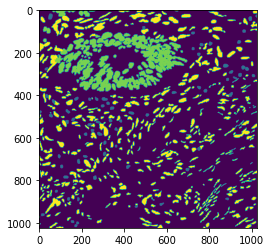

In [ ]:
#plt.imshow(Y_test[idx].argmax(axis=2))
plt.imshow(Y_test[idx])